In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygmt
from pygmt.datasets import load_earth_relief
# Set the universal font type to times new roman
plt.rcParams["font.family"] = "Times New Roman"

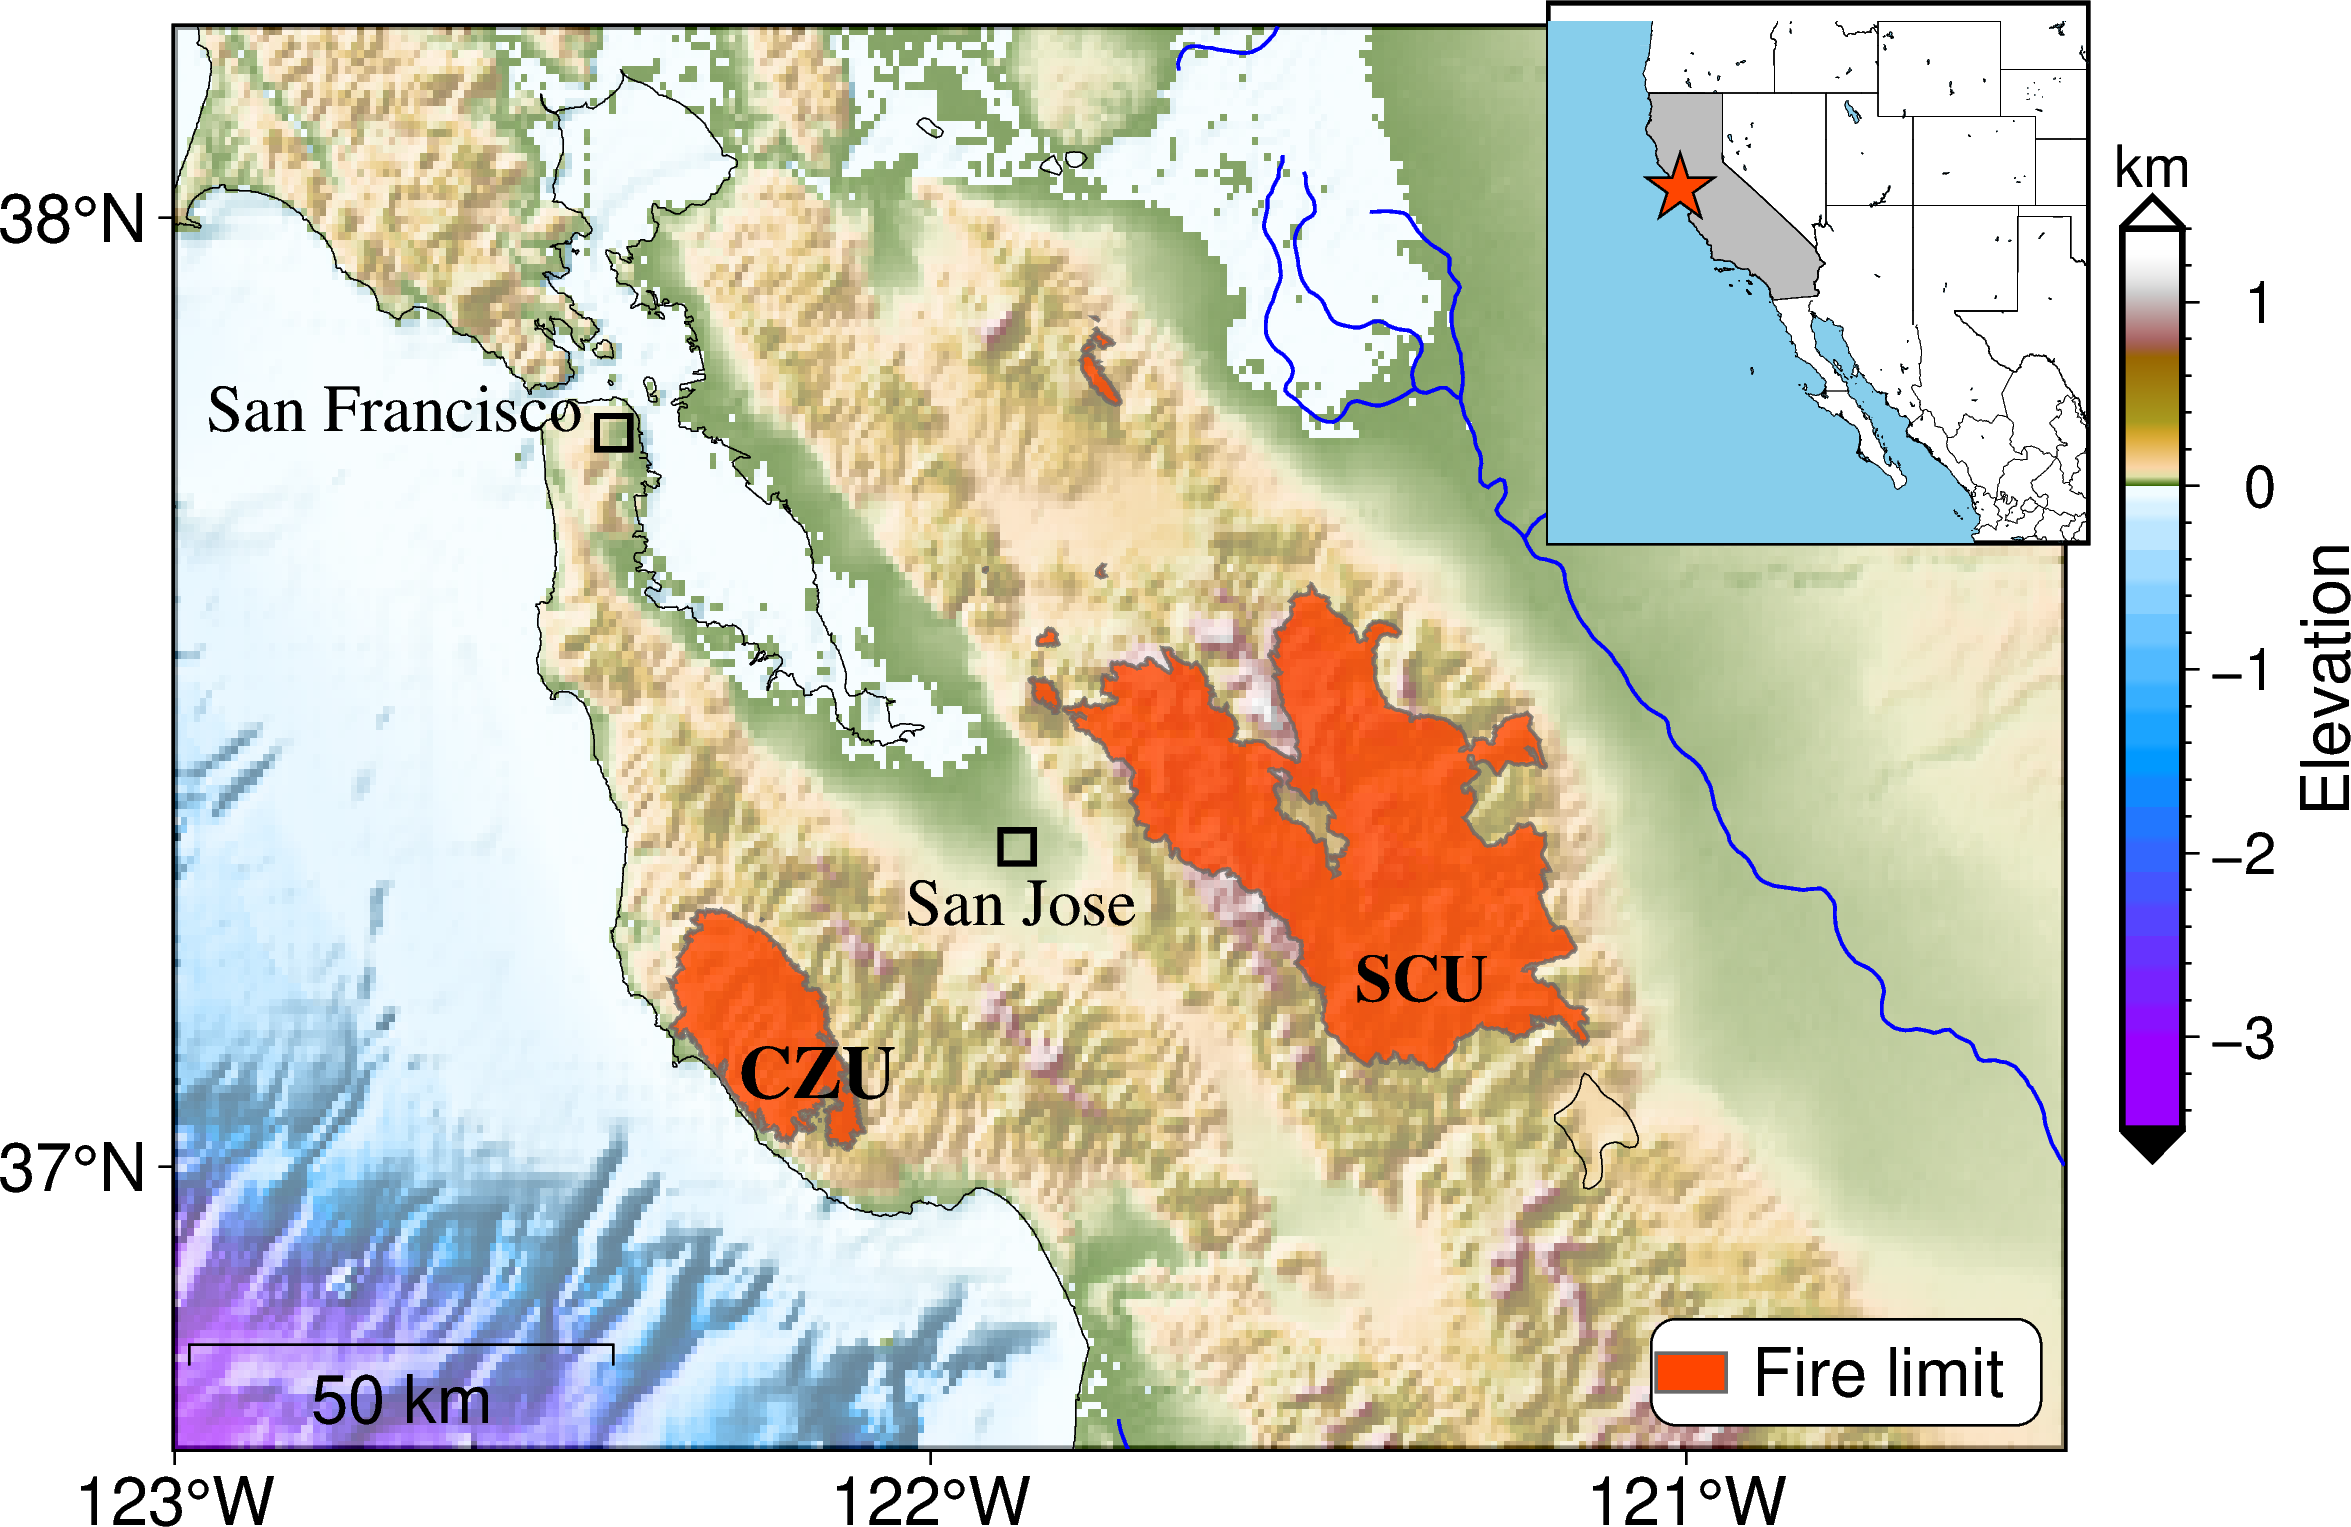

In [21]:
# -------------------------------------- Load the fire shapefile --------------------------------------
fire_shp = gpd.read_file('Bay_Area_2020_Fire_shp/California_Fire_Perimeters__all_.shp')
fire_shp = fire_shp.to_crs('EPSG:4326')


# -------------------------------------- Create the pygmt figure --------------------------------------
fig = pygmt.Figure()

pygmt.config(MAP_FRAME_TYPE="plain",FONT_ANNOT_PRIMARY="18p",FONT_LABEL='16p',FONT_TAG="16p",)

pygmt.config(FONT_ANNOT_PRIMARY="16p")
# Set the region xmin,xmax,ymin,ymax
region = [-123,-120.5,36.7,38.2]
fig.basemap(region=region, projection='M16c',frame=['WSrt',"a"])

# define etopo data file
topo_data_2 = "@earth_relief_30s"
# grid_ = load_earth_relief(resolution="01s", region=region, registration="gridline", use_srtm=True,)

# make color pallets for the elevation map
pygmt.makecpt(cmap='globe',series='-3500/1400/50', continuous=True)
# plot high res topography
fig.grdimage(grid=topo_data_2, shading=True, transparency=40, frame=None)
fig.coast(rivers="r/0.8p,blue,solid",borders="2/0.5p,black",shorelines=True,
          map_scale='g-122.7/36.8+w50k+al+ukm')
fig.plot(region=region, data=fire_shp, pen="0.8p,dimgray", fill='orangered', 
         transparency=20, label="Fire limit")

# City landmark labels
fig.plot(x=[-122.4194, -121.8853], y=[37.7749, 37.3387], style="s0.4c", pen="1.4p,black")
fig.text(x= -122.71,y=37.8, text="San Francisco", font="16p,Times-Roman,black",angle=0)
fig.text(x= -121.88,y=37.28, text="San Jose", font="16p,Times-Roman,black",angle=0)

# Fire name labels
fig.text(x= -121.35,y=37.2, text="SCU", font="16p,Times-Bold,black",angle=0)
fig.text(x= -122.15,y=37.1, text="CZU", font="18p,Times-Bold,black",angle=0)

# Legend
fig.legend(position="JBR+jBR+o0.2c+w3.3c/0.9c", box='+gwhite+p0.5p+r')

# Inset Map
with fig.inset(position="jTR+w1.8i+o-0.2c", box="+gwhite+p1p"):
    fig.coast(region=[-130,-99,20,45],projection="M1.8i",borders="2/0.1,black",shorelines="0.1p,black",
              water="skyblue",dcw=["US.CA+ggrey+p0.2p","US.TX+p0.2p"],resolution='h')
    # Plot a star around SF
    fig.plot(x=[-122.4194], y=[37.7749], style="a0.6c", pen="0.5p,black", fill='orangered')
# Color Bar
pygmt.config(FONT_ANNOT_PRIMARY="14p",FONT_LABEL='16p',FONT_TAG="12p",)
fig.colorbar(frame=['x+l"Elevation"','y+lkm'],scale=0.001, position="jMR+o-1./0.5c+w3i/0.2i+e+m+v",)

fig.savefig('Basemap.png')

fig.show()